In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

In [ ]:
os.listdir("./drive/MyDrive/Model Prediction/")

['my_h5_model.h5', 'Test files']

In [ ]:
from tensorflow.keras.models import load_model
import os
import cv2 
import numpy as np 

from PIL import Image
from google.colab.patches import cv2_imshow

In [ ]:
filepath = './drive/My Drive/Model Prediction/my_h5_model.h5'

In [ ]:
model = load_model(filepath)

In [ ]:
os.listdir("./drive/My Drive/Model Prediction/Test files") #listing the contents in the location 

['dt_val_10.jpg',
 'dt_val_1.jpg',
 'dt_val_2.jpg',
 'dt_val_3.jpg',
 'dt_val_4.jpg',
 'dt_val_5.jpg',
 'dt_val_6.jpg',
 'dt_val_7.jpg',
 'dt_val_8.jpg',
 'dt_val_9.jpg']

In [ ]:
file_path="./drive/My Drive/Model Prediction/Test files/"

In [ ]:
def create_lr_data(img_path="",img_file="",compression_factor=10,w=0,h=0):
  
  img=cv2.imread(img_path+img_file)
  # print(img)
  if w!=0 and h!=0:
    newimg1=cv2.resize(img,(w,h),interpolation=cv2.INTER_CUBIC)
    # cv2_imshow(newimg1)
    return newimg1
  else:
    w=img.shape[1]  
    h=img.shape[0]  
    newimg1=cv2.resize(img,(int(w/compression_factor),int(h/compression_factor)),interpolation=cv2.INTER_CUBIC)
    # cv2_imshow(newimg1)
    return newimg1

In [ ]:
hr_arr=[]
lr_arr=[]
error_images=[]
for imgs in os.listdir(file_path):
  try:
    img_hr=create_lr_data(img_path=file_path, img_file=imgs, w=300,h=300)
    hr_arr.append(img_hr)
    img_lr=create_lr_data(img_path=file_path, img_file=imgs, w=60,h=60)
    lr_arr.append(img_lr)
  except Exception as e:
    print(e)
    error_images.append(imgs)
  # cv2_imshow(img_lr)
  # break
hr_arr=np.array(hr_arr)
lr_arr=np.array(lr_arr)

In [ ]:
pred = model.predict(lr_arr)

In [ ]:
pred.shape

(10, 300, 300, 3)

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
matplotlib.pyplot.subplot

<function matplotlib.pyplot.subplot>

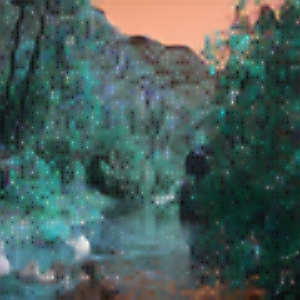

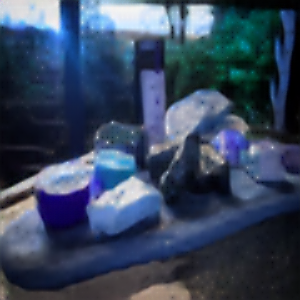

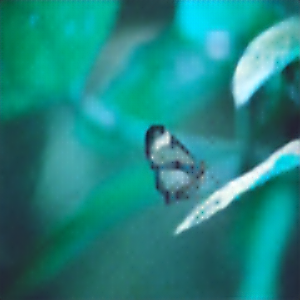

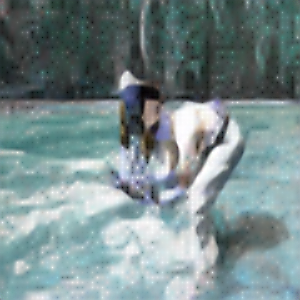

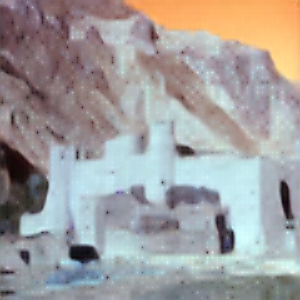

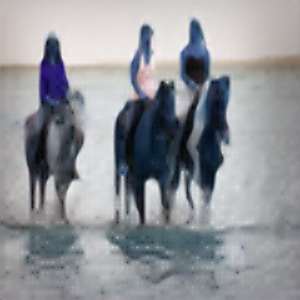

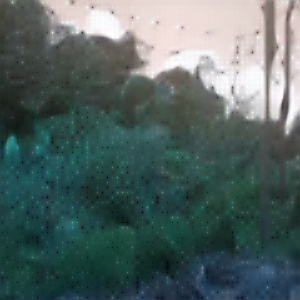

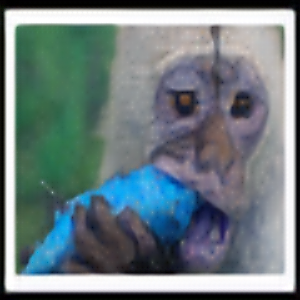

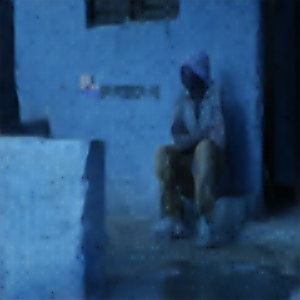

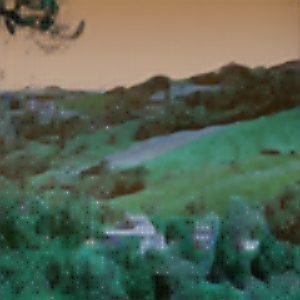

In [ ]:
for im in pred:
  pred_new= im.reshape(300,300,3)
  image= Image.fromarray(pred_new,'RGB')
  image = cv2.cvtColor(pred_new,cv2.COLOR_RGB2BGR)
  cv2_imshow(image)

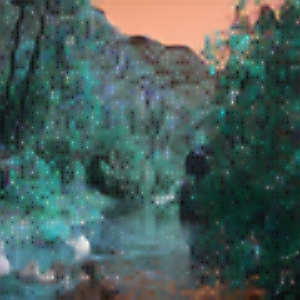

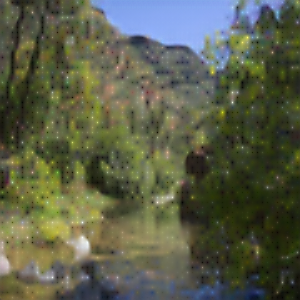

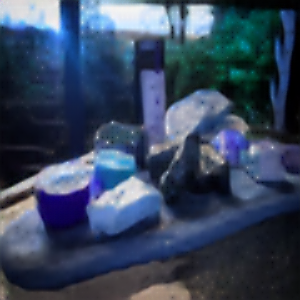

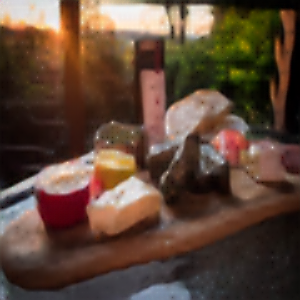

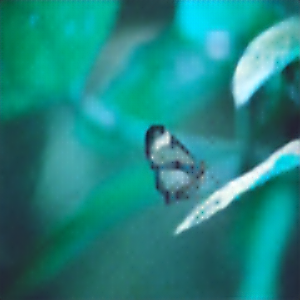

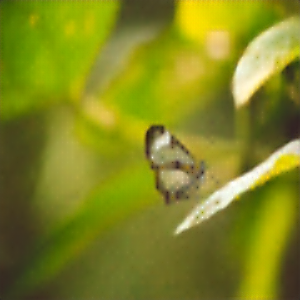

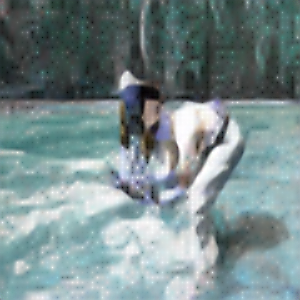

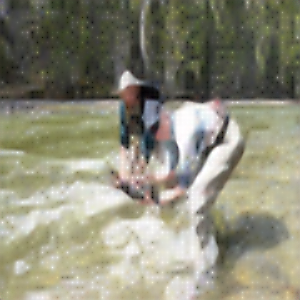

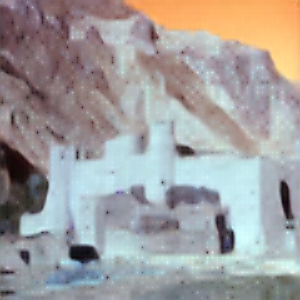

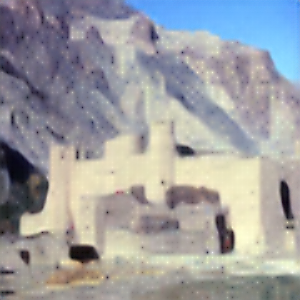

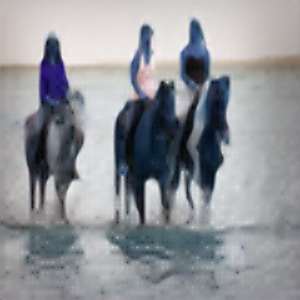

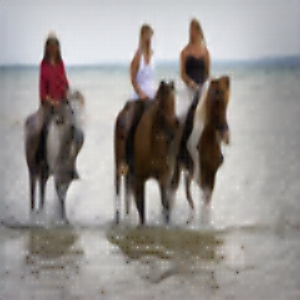

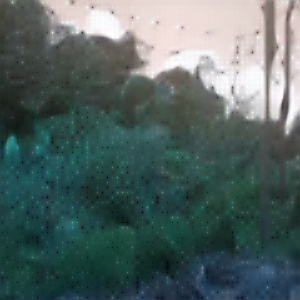

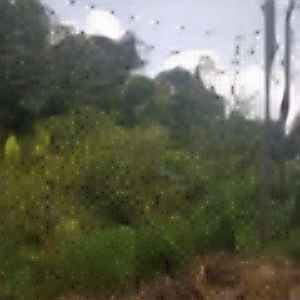

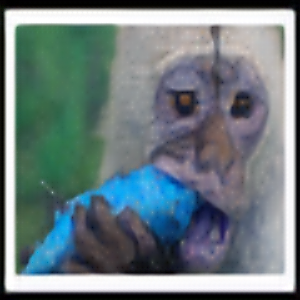

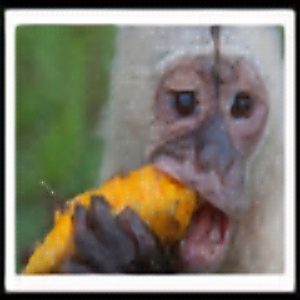

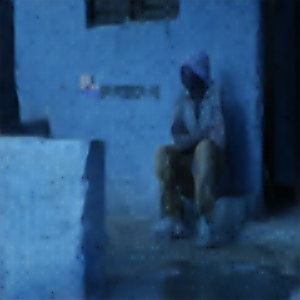

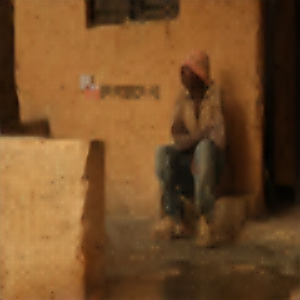

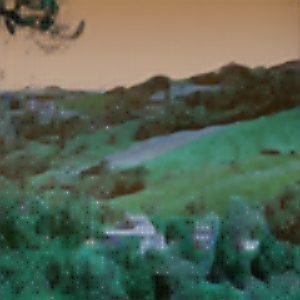

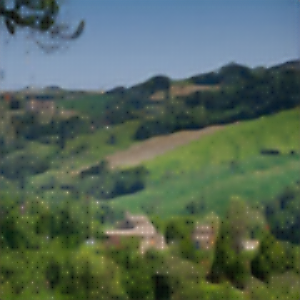

In [ ]:
for im in pred:
  pred_new= im.reshape(300,300,3)

  image = cv2.cvtColor(pred_new,cv2.COLOR_RGB2BGR)
  cv2_imshow(image)
  cv2_imshow(pred_new)

##output printing

INPUT LOW RESOLUTION


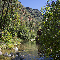

INPUT HIGH RESOLUTION


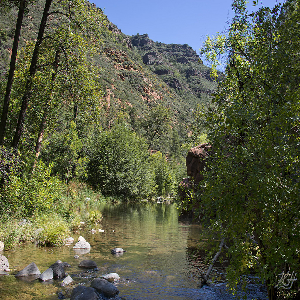

OUTPUT HIGH RESOLUTION


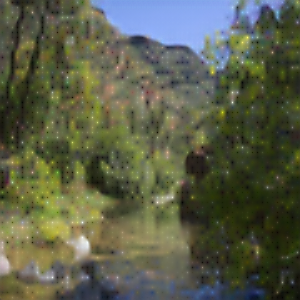

INPUT LOW RESOLUTION


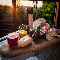

INPUT HIGH RESOLUTION


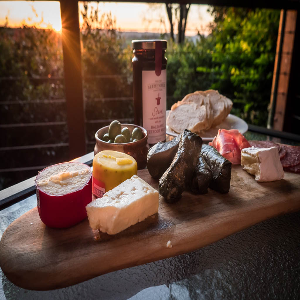

OUTPUT HIGH RESOLUTION


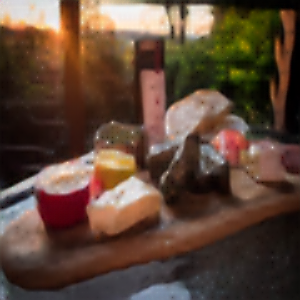

INPUT LOW RESOLUTION


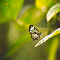

INPUT HIGH RESOLUTION


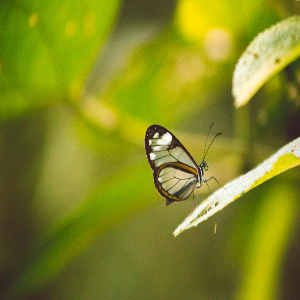

OUTPUT HIGH RESOLUTION


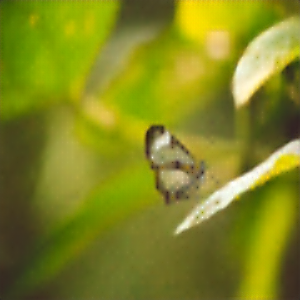

INPUT LOW RESOLUTION


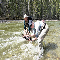

INPUT HIGH RESOLUTION


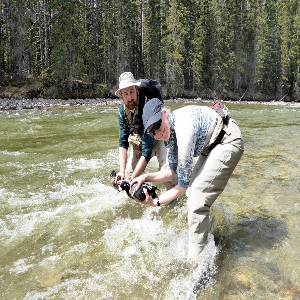

OUTPUT HIGH RESOLUTION


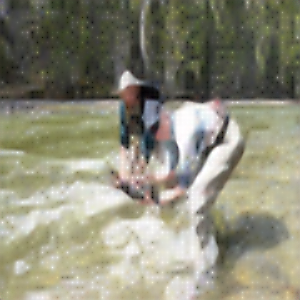

INPUT LOW RESOLUTION


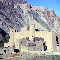

INPUT HIGH RESOLUTION


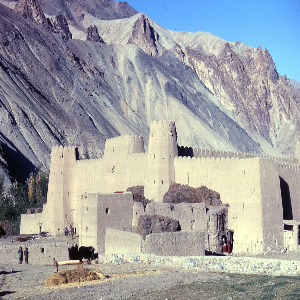

OUTPUT HIGH RESOLUTION


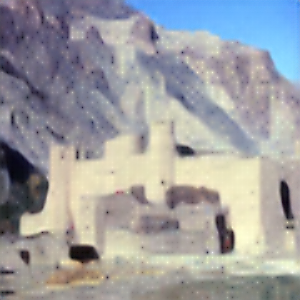

INPUT LOW RESOLUTION


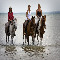

INPUT HIGH RESOLUTION


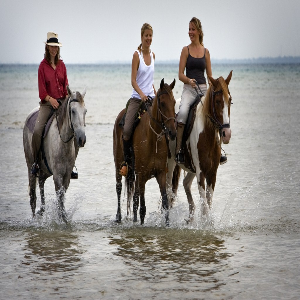

OUTPUT HIGH RESOLUTION


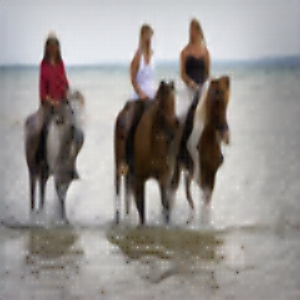

INPUT LOW RESOLUTION


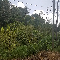

INPUT HIGH RESOLUTION


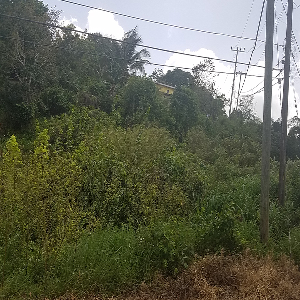

OUTPUT HIGH RESOLUTION


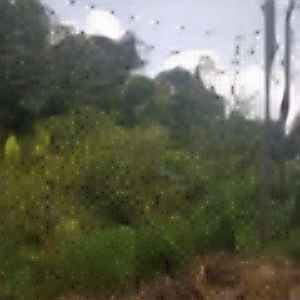

INPUT LOW RESOLUTION


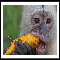

INPUT HIGH RESOLUTION


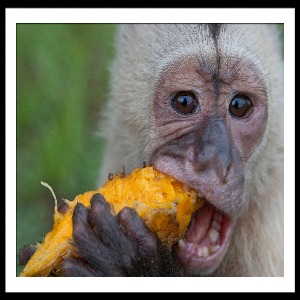

OUTPUT HIGH RESOLUTION


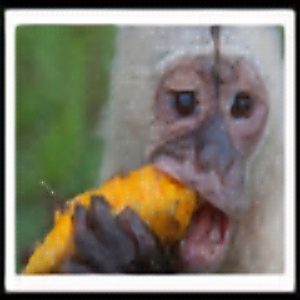

INPUT LOW RESOLUTION


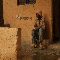

INPUT HIGH RESOLUTION


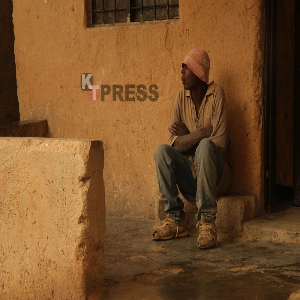

OUTPUT HIGH RESOLUTION


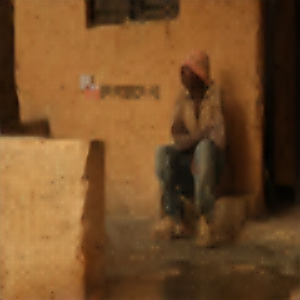

INPUT LOW RESOLUTION


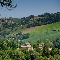

INPUT HIGH RESOLUTION


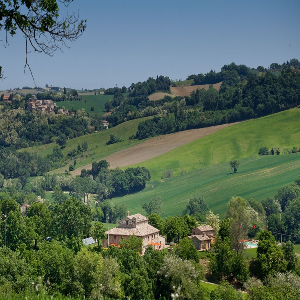

OUTPUT HIGH RESOLUTION


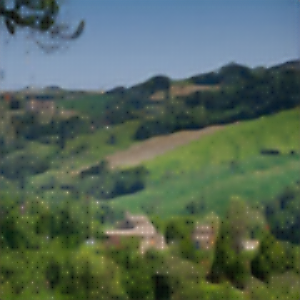

In [ ]:
for pr,lr,hr in zip(pred,lr_arr,hr_arr):
  print("INPUT LOW RESOLUTION")
  cv2_imshow(lr)
  print("INPUT HIGH RESOLUTION")
  cv2_imshow(hr)
  print("OUTPUT HIGH RESOLUTION")
  cv2_imshow(pr)

In [ ]:
from skimage import measure

def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

In [ ]:
mse(pr,hr)

# s = measure.compare_ssim(pr, hr,multichannel=True)

1300.024126052228

In [ ]:
import tensorflow as tf


In [ ]:
tf.reduce_mean(tf.square(tf.subtract(pr, hr)))

<tf.Tensor: shape=(), dtype=float32, numpy=433.34137>

In [ ]:
tf.image.ssim(pr,hr,max_val=255)

InvalidArgumentError: ignored

In [ ]:
!pip install pytorch_ssim

  Created wheel for pytorch-ssim: filename=pytorch_ssim-0.1-cp36-none-any.whl size=2026 sha256=25e8fa620edab15460d88a9dbbe0c3e77112c6943c53ede4ae1442279a37d402
  Stored in directory: /root/.cache/pip/wheels/86/60/c8/85a73ea90dcf1d39d5d7f94d83988511f0370229dee641bb79
Successfully built pytorch-ssim


In [ ]:
import pytorch_ssim
import torch

In [ ]:
from torch.autograd import Variable

img1 = Variable(torch.tensor(pr))
img2 = Variable(torch.tensor(hr))

In [ ]:
# pytorch_ssim.ssim(img1, img2)

In [ ]:
img1

tensor([[[ 60.7963,  52.3744,  43.7220],
         [ 69.5585,  60.0468,  43.9905],
         [ 69.1720,  66.5709,  40.0947],
         ...,
         [153.7912, 119.7137,  80.6011],
         [146.1086, 108.3298,  83.4578],
         [139.6815, 112.7027,  93.7174]],

        [[ 65.7499,  57.4401,  42.1859],
         [ 66.1255,  62.1886,  39.6956],
         [ 68.8612,  60.7469,  36.1637],
         ...,
         [146.2731, 120.1856,  73.1349],
         [142.5081, 112.0000,  79.3370],
         [147.7137, 115.2602,  86.7961]],

        [[ 62.0052,  59.1593,  39.8188],
         [ 60.0580,  58.7968,  35.3656],
         [ 56.0931,  56.2533,  30.6876],
         ...,
         [145.6658, 112.2636,  73.3035],
         [150.9160, 113.2619,  70.7435],
         [144.9530, 112.2861,  79.6215]],

        ...,

        [[ 40.8413,  98.2841,  83.4892],
         [ 34.7496,  98.7762,  78.6974],
         [ 27.0304,  96.1787,  76.7103],
         ...,
         [  2.9946,  80.9369,  62.6233],
         [ 21.8178,  8